In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,449 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and di

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 34.4 MB/s eta 0:00:00


In [ ]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from tqdm import tqdm
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/everytime_type.csv')

In [ ]:
def preprocess_df(df_):
  df_.drop(['Unnamed: 0'], inplace = True, axis = 1)
  df_['date'] = pd.to_datetime(df_['date'])
  df_['length']=df_['content'].apply(lambda x: len(x))
  return df_

In [ ]:
df = preprocess_df(raw_df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4631 entries, 0 to 4630
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0.1   4631 non-null   int64         
 1   content        4631 non-null   object        
 2   comment        4631 non-null   object        
 3   like           4631 non-null   int64         
 4   comment_count  4631 non-null   int64         
 5   scrap          4631 non-null   int64         
 6   date           4631 non-null   datetime64[ns]
 7   label          4631 non-null   object        
 8   type           4631 non-null   object        
 9   polarity       4631 non-null   object        
 10  tense          4631 non-null   object        
 11  certainty      4631 non-null   object        
 12  length         4631 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 470.5+ KB


In [ ]:
print(df['type'].value_counts())
print(df['tense'].value_counts())
print(df['certainty'].value_counts())

type
사실형    3461
추론형     696
대화형     474
Name: count, dtype: int64
tense
현재    2943
과거    1517
미래     171
Name: count, dtype: int64
certainty
확실     4533
불확실      98
Name: count, dtype: int64


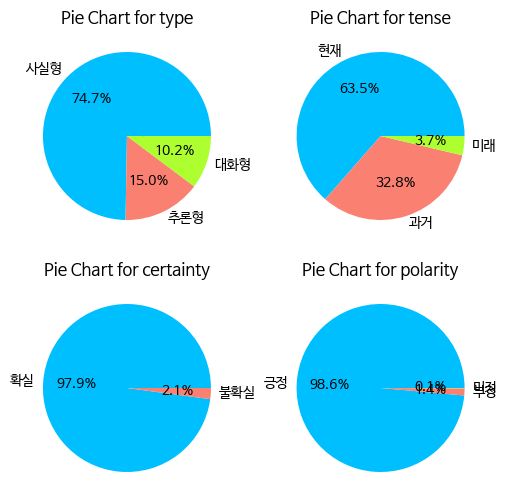

In [ ]:

column_list=['type','tense','certainty','polarity']
i=0
plt.figure(figsize=(6,6))
for column in column_list:
    i+=1
    color=['deepskyblue', 'salmon','greenyellow']
    value_counts = df[column].value_counts()
    plt.subplot(2,2,i)
    plt.title(f'Pie Chart for {column}')

    pie_chart = plt.pie(value_counts, labels=value_counts.index,colors=color, autopct='%1.1f%%')

plt.show()

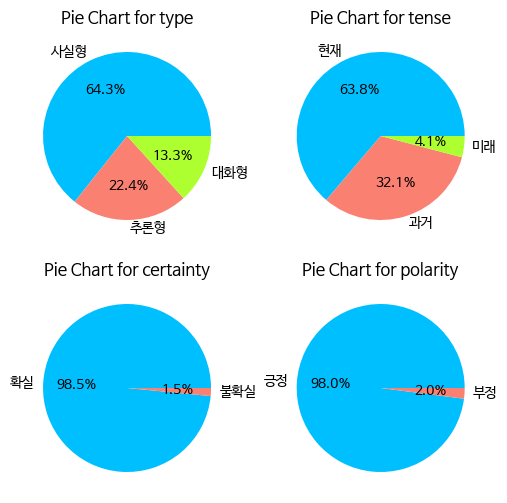

In [ ]:
column_list=['type','tense','certainty','polarity']
i=0
plt.figure(figsize=(6,6))
for column in column_list:
    i+=1
    color=['deepskyblue', 'salmon','greenyellow']
    value_counts = df_scrap_sort50[column].value_counts()
    plt.subplot(2,2,i)
    plt.title(f'Pie Chart for {column}')

    pie_chart = plt.pie(value_counts, labels=value_counts.index,colors=color, autopct='%1.1f%%')

plt.show()

In [ ]:
df[df['content'].str.contains("세종")]['content'][:20]

224      협문은 대학 왜다니냐?\n솔직히 세종은 고대아니지 않음?\n페미들 진짜 PC개지리...
292      [제 44회 IPSELENTI 지.야의 함성 티켓 판매 일정 및 방식]\n우리의 ...
503     세종캠 다니는 캣맘이 페미인데 군대 가서 공부하면 서울캠 입결 정도는 잡을 수 있다...
647     너네들 너무 세종 애들 배척하는거 아니냐? 잘 얘기하다가도 세종인 것 같으면 갑자기...
767                              세종년들 ㅈㄴ오네 전공때 보기싫음 ㄹㅇㅋㅋ;
822      🔥2023-1 고대신문 수습기자 추가모집🔥\n🔥2023-1 고대신문 수습기자 추가...
1067     [D-DAY] 🔥2023-1 고대신문 수습기자 모집🔥\n\n🔥2023-1 고대신문...
1116     [D-2] 🔥2023-1 고대신문 수습기자 모집🔥\n\n🔥2023-1 고대신문 수...
1349     🔥2023-1 고대신문 수습기자 모집🔥\n🔥2023-1 고대신문 수습기자 모집🔥\...
1395     한양대>고려대 인 이유\n\n한양대 에리카>고려대 세종캠 이 참 이므로\n귀납적으...
1505                                마 세종캠은 항상 우리와 함께다 알갔나
1546    전과자에 나온 그분 지난 번 야구 응원할 때 처음 봤는데 우리 야구 지고 있을 때 ...
1600                            세종대왕의 맥북프로 투척 사건.jpg ...?
1723     현실 대학 인식\n\n서울대\n\n할말을 잃는다 .. 당황한다 , 그리고 매우 당...
1740                                        세종대 수강신청 근황 🤔
1949    세종이랑 싸운다고 문제가 해결되진 않는다 아마 악마 고대생 프레임만 강해질거다. 정...
1968    다들 이글 신고 ㄱㄱ 작성자 세종캠임\n혹시 예전에 올라온 세종캠에타 글 본 사람은...
1972     에타에 세

In [ ]:
import re

from konlpy.tag import Okt
okt = Okt()

with open('/content/drive/MyDrive/stopwords_.txt',  encoding='cp949') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")

#for word in new_stopwords:
#    stopwords.append(word)

In [ ]:
def preprocess(raw_text):
    raw_text = re.sub('[1-9-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', raw_text)
    text1 = ' '.join(raw_text.split())
    morphs_ = okt.morphs(text1, stem=True)
    remove_stop = [x for x in morphs_ if x not in stopwords]
    remove_one = [x for x in remove_stop if len(x)>1]
    text = " ".join(remove_one)
    return text

def make_corpus(df_):
    df_len = df_.shape[0]
    word_list = []
    for i in tqdm(range(df_len)):
        word_list.append(preprocess(df_['content'][i]))
    return word_list

In [ ]:
# 스크랩 수가 50개 이상인 게시글들만 따로 데이터프레임으로 만든다.
df_scrap_sort50 = df[df['scrap']>=50]
df_scrap_sort50 = df_scrap_sort50.reset_index(drop=True)

Text(0.5, 1.0, '주간별 hot게시물 빈도수 그래프')

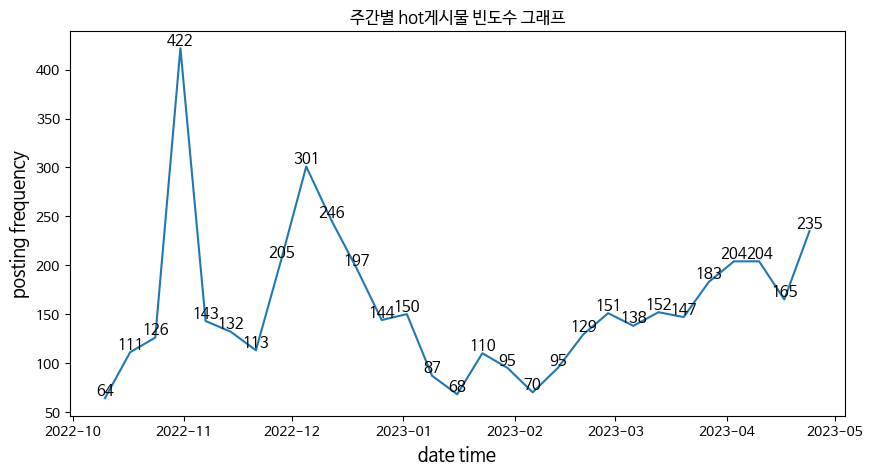

In [ ]:
import numpy as np
df_ = df
df_.set_index(df_['date'], inplace=True)
df_['cnt']=1
df_month = df_.resample('W-MON')['cnt'].agg(np.sum).fillna(0)
len(df_month)
df_month = df_month[1:30]

x=df_month.index
y=df_month
plt.figure(figsize=(10,5))
plt.plot(df_month)
plt.xlabel('date time', fontsize=13)
plt.ylabel('posting frequency', fontsize=13)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 11,

             horizontalalignment ='center',
             verticalalignment = 'bottom')
plt.title("주간별 hot게시물 빈도수 그래프")

Text(0.5, 1.0, '주간별 스크랩 50 이상 hot게시물 빈도수 그래프')

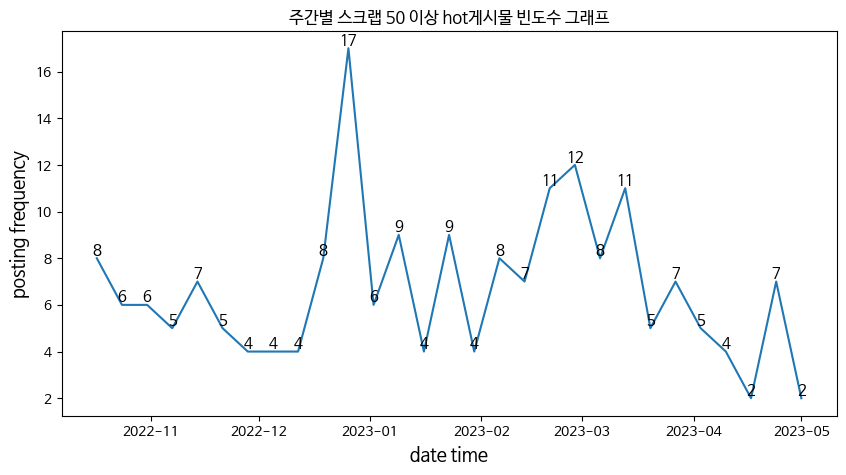

In [ ]:
import numpy as np
df_ = df_scrap_sort50
df_.set_index(df_['date'], inplace=True)
df_['cnt']=1
df_month = df_.resample('W-MON')['cnt'].agg(np.sum).fillna(0)
len(df_month)
df_month = df_month[1:30]

x=df_month.index
y=df_month
plt.figure(figsize=(10,5))
plt.plot(df_month)
plt.xlabel('date time', fontsize=13)
plt.ylabel('posting frequency', fontsize=13)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 11,

             horizontalalignment ='center',
             verticalalignment = 'bottom')
plt.title("주간별 스크랩 50 이상 hot게시물 빈도수 그래프")

In [ ]:
# 스크랩 수가 50개 이상인 게시글의 말뭉치를 만든다.
wordlist_scrap = make_corpus(df_scrap_sort50)

# 모든 게시물 말뭉치를 만든다.
temp_wordlist=make_corpus(df)

100%|██████████| 4631/4631 [01:32<00:00, 49.84it/s] 


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

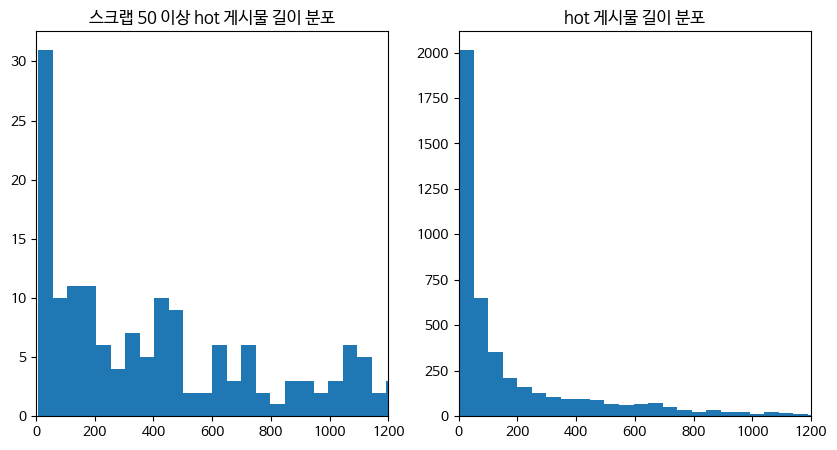

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.xlim([0,1200])
plt.hist(df_scrap_sort50['length'], bins=200)
plt.title("스크랩 50 이상 hot 게시물 길이 분포")

plt.subplot(1,2,2)
plt.xlim([0,1200])
plt.hist(df['length'], bins=200)
plt.title("hot 게시물 길이 분포")

plt.show

In [ ]:
%matplotlib inline
def displayWordCloud(data = None, backgroundcolor = 'white', width=None, height=None):
    wordcloud = WordCloud(font_path = '/content/drive/MyDrive/sentence/MALGUN.TTF',
                          background_color = backgroundcolor,
                          width = width,
                          height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


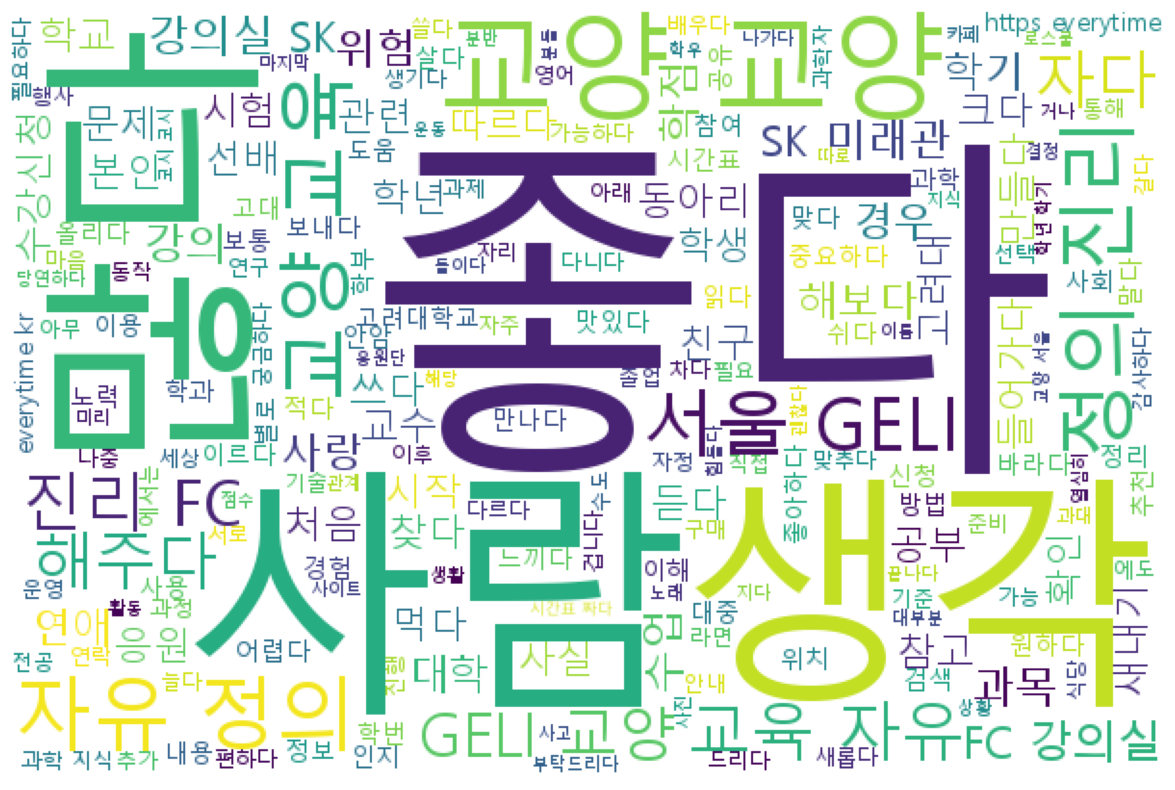

In [ ]:
displayWordCloud(data = ' '.join(wordlist_scrap), width=600, height=400)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


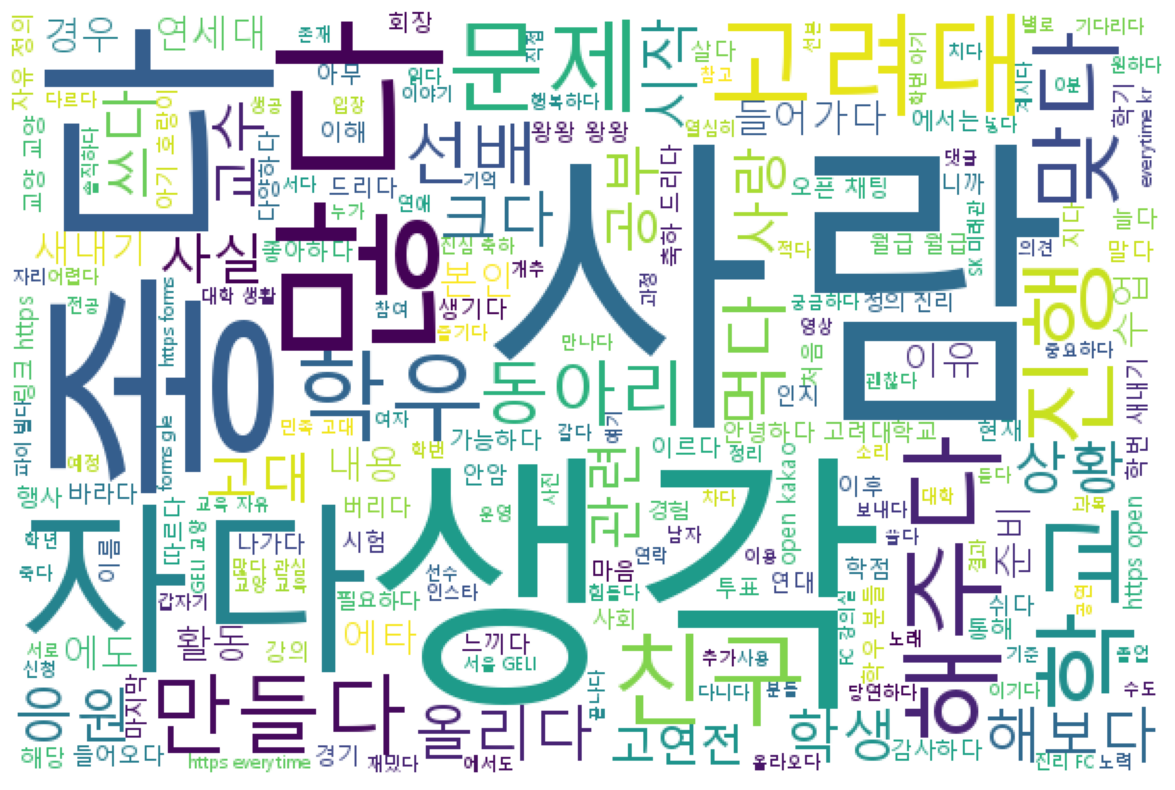

In [ ]:
displayWordCloud(data = ' '.join(temp_wordlist), width=600, height=400)

In [ ]:
def vocab_dict(wordlist):
    vocab = []
    length=len(wordlist)
    for i in range(length):
        new_wordlist = wordlist[i].split()
        for j in new_wordlist:
            vocab.append(j)
    return vocab

In [ ]:
all_vocab = vocab_dict(temp_wordlist)

In [ ]:
scrap_vocab = vocab_dict(wordlist_scrap)

In [ ]:
from collections import Counter
all_freq = Counter(all_vocab)
scrap_freq = Counter(scrap_vocab)

In [ ]:
# 단어 토큰화 과정에서 생긴 무의미한 단어들은 제외
all_freq.pop('https')
all_freq.pop('com')
all_freq.pop('00')
scrap_freq.pop('https')
scrap_freq.pop('com')
scrap_freq.pop('00')

226

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


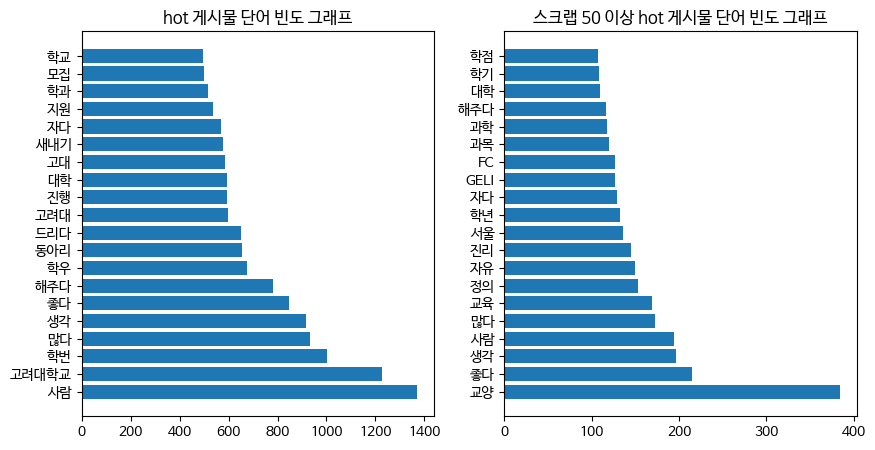

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
x_values=[]
y_values=[]
for i in range(20):
    x_values.append(all_freq.most_common()[i][0])
    y_values.append(all_freq.most_common()[i][1])

plt.barh(x_values, y_values)
plt.title("hot 게시물 단어 빈도 그래프")

plt.subplot(1,2,2)
x_values=[]
y_values=[]
for i in range(20):
    x_values.append(scrap_freq.most_common()[i][0])
    y_values.append(scrap_freq.most_common()[i][1])

plt.barh(x_values, y_values)
plt.title("스크랩 50 이상 hot 게시물 단어 빈도 그래프")

plt.show()

In [ ]:
import gensim
from gensim.models import LdaModel
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
dic = gensim.corpora.Dictionary([all_vocab])
bow_corpus = [dic.doc2bow(doc) for doc in [all_vocab]]
lda_model =  gensim.models.LdaModel(bow_corpus,
                                num_topics = 5,
                                id2word = dic)
pyLDAvis.enable_notebook()
result = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.002807  0.000012       1        1  47.228294
2      0.002182  0.001276       2        1  35.716045
1     -0.000699 -0.003804       3        1  11.263550
3     -0.001453  0.001201       4        1   5.233891
4     -0.002837  0.001315       5        1   0.558221, topic_info=        Term         Freq        Total Category  logprob  loglift
9486      사람  1200.000000  1200.000000  Default  30.0000  30.0000
3715   고려대학교  1084.000000  1084.000000  Default  29.0000  29.0000
17965     학번   923.000000   923.000000  Default  28.0000  28.0000
15189     좋다   727.000000   727.000000  Default  27.0000  27.0000
7164      많다   879.000000   879.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
3713     고려대     2.597130   535.903816   Topic5  -6.0753  -0.1414
8683     보내다     2.291373   441.461439   Topic5  -6.2005  -0.0728
9844      생각     3.183391   892.226136   Topic5  -5.8717  -0.4476
18259     행사     2.205205   414.601784   Topic5  -6.2389  -0.0483
4096      교양     2.123083   377.987649   Topic5  -6.2768   0.0062

[447 rows x 6 columns], token_table=       Topic      Freq Term
term                       
8          1  0.464280   00
8          2  0.300280   00
8          3  0.150140   00
8          4  0.080845   00
8          5  0.006930   00
...      ...       ...  ...
18715      5  0.009439   회칙
18904      1  0.412117  힘드다
18904      2  0.366326  힘드다
18904      3  0.160268  힘드다
18904      4  0.045791  힘드다

[1193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5])

In [ ]:
dic = gensim.corpora.Dictionary([scrap_vocab])
bow_corpus = [dic.doc2bow(doc) for doc in [scrap_vocab]]
lda_model =  gensim.models.LdaModel(bow_corpus,
                                num_topics = 3,
                                id2word = dic)
pyLDAvis.enable_notebook()
result = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.003275 -0.000020       1        1  91.237200
1      0.001660 -0.002249       2        1   4.828324
2      0.001615  0.002269       3        1   3.934477, topic_info=     Term        Freq       Total Category  logprob  loglift
1046   교양  329.000000  329.000000  Default  30.0000  30.0000
1      00  196.000000  196.000000  Default  29.0000  29.0000
5291   좋다  173.000000  173.000000  Default  28.0000  28.0000
3219   생각  156.000000  156.000000  Default  27.0000  27.0000
3081   사람  181.000000  181.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
1768   대학    3.368735  105.992944   Topic3  -5.8909  -0.2134
5488   진리    3.966521  151.610467   Topic3  -5.7276  -0.4080
984    과목    3.120326  108.210723   Topic3  -5.9675  -0.3108
4503   위치    2.610748   68.691023   Topic3  -6.1458  -0.0346
674    강의    2.656495   96.663902   Topic3  -6.1284  -0.3588

[259 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1         1  0.918007    00
1         2  0.051000    00
1         3  0.030600    00
6         1  0.883867  000원
6         2  0.057024  000원
...     ...       ...   ...
6423      3  0.038265   해주다
6540      1  0.898180  홈페이지
6540      2  0.089818  홈페이지
6540      3  0.044909  홈페이지
6575      1  0.829550    환산

[363 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])